In [2]:
import pickle
from root_pandas import read_root
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

In [3]:
channels = ['mumug', 'elelg']

sig_datasets = ['hzg_gluglu', 'hzg_vbf', 'hzg_zh', 'hzg_wh', 'hzg_tth']
bg_datasets = ['zjets_m-50_amc', 'zg_llg']

In [4]:
df_dict = {}
for channel in channels:
    df_sig = []
    df_bg = []
    for dataset in sig_datasets:
        df_sig.append(read_root('../data/step3_vbf_bdt/output_{0}_2016_flat.root'.format(channel), dataset))
    for dataset in bg_datasets:
        if dataset == 'zjets_m-50_amc':
            df_bg.append(read_root('../data/step3_vbf_bdt/output_{0}_2016_flat.root'.format(channel), dataset).query('not vetoDY'))
        else:
            df_bg.append(read_root('../data/step3_vbf_bdt/output_{0}_2016_flat.root'.format(channel), dataset))
    df_dict['{0}_sig'.format(channel)] = pd.concat(df_sig)
    df_dict['{0}_bg'.format(channel)] = pd.concat(df_bg)

In [ ]:
fig, ax = plt.subplots()
sig = df_dict['mumug_sig'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
bg = df_dict['mumug_bg'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
ax.hist(sig['kin_bdt'], bins=40, range=[-0.4, 0.4], label='muon signal', histtype='step', color='b', density=True);#weights=sig['eventWeight']);
ax.hist(bg['kin_bdt'], bins=40, range=[-0.4, 0.4], label='muon background', histtype='step', color='r', density=True);#weights=bg['eventWeight']);
ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();

In [ ]:
fig, ax = plt.subplots()
sig = df_dict['elelg_sig'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
bg = df_dict['elelg_bg'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
ax.hist(sig['kin_bdt'], bins=40, range=[-0.4, 0.4], label='electron signal', histtype='step', color='b', density=True);#weights=sig['eventWeight']);
ax.hist(bg['kin_bdt'], bins=40, range=[-0.4, 0.4], label='electron background', histtype='step', color='r', density=True);#weights=bg['eventWeight']);
ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend();

In [5]:
muon_sig = df_dict['mumug_sig'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
muon_bg = df_dict['mumug_bg'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
electron_sig = df_dict['elelg_sig'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')
electron_bg = df_dict['elelg_bg'].astype('float').query('vbf_bdt < -0.01 and not isLeptonTag == 1')

In [8]:
muon_sig = df_dict['mumug_sig'].astype('float').query('isDijetTag == 1. and not isLeptonTag == 1')
muon_bg = df_dict['mumug_bg'].astype('float').query('isDijetTag == 1. and not isLeptonTag == 1')
electron_sig = df_dict['elelg_sig'].astype('float').query('isDijetTag == 1. and not isLeptonTag == 1')
electron_bg = df_dict['elelg_bg'].astype('float').query('isDijetTag == 1. and not isLeptonTag == 1')

In [ ]:
bdt_cuts = np.linspace(-1., 1., num=1000)
eff_s_arr_mu = []
eff_b_arr_mu = []
sens_app_arr_mu = []
for i in range(len(bdt_cuts)):
    this_sig = muon_sig.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    this_bg = muon_bg.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(muon_sig.eventWeight)
    eff_s_arr_mu.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(muon_bg.eventWeight)
    eff_b_arr_mu.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr_mu.append(sens_app)
    
eff_s_arr_mu = np.array(eff_s_arr_mu)
eff_b_arr_mu = np.array(eff_b_arr_mu)
sens_app_arr = np.array(sens_app_arr_mu)

fig, ax = plt.subplots()
ax.plot(bdt_cuts, eff_s_arr_mu, label=r'$\varepsilon_{s}$');
ax.plot(bdt_cuts, eff_b_arr_mu, label=r'$\varepsilon_{b}$');

ax2 = ax.twinx()
ax2.plot(bdt_cuts, sens_app_arr_mu, label=r'$\frac{s}{\sqrt{s+b}}$', color='r')
ax.set_xlabel('kinematic BDT score')
#ax.set_ylabel('sensitivity')
ax.legend(loc='upper left');
ax.set_xlim(-0.5, 0.2)
ax.legend(loc='lower left', prop={'size': 24});
ax2.legend(prop={'size': 24});
plt.title('Muon Channel')
plt.savefig('kin_bdt_sensitivity_muon.png', dpi=500)
#ax2.set_ylim(0., 0.05)
#ax2.yaxis.set_ticks(np.linspace(0, 0.05, num=11))

sens_app_arr_mu = np.nan_to_num(sens_app_arr_mu)
ind_mu = sens_app_arr_mu.argmax()
print(bdt_cuts[ind_mu])

In [ ]:
bdt_cuts = np.linspace(-1., 1., num=1000)
eff_s_arr_ele = []
eff_b_arr_ele = []
sens_app_arr_ele = []
for i in range(len(bdt_cuts)):
    this_sig = electron_sig.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    this_bg = electron_bg.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(electron_sig.eventWeight)
    eff_s_arr_ele.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(electron_bg.eventWeight)
    eff_b_arr_ele.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr_ele.append(sens_app)
    
eff_s_arr_ele = np.array(eff_s_arr_ele)
eff_b_arr_ele = np.array(eff_b_arr_ele)
sens_app_arr_ele = np.array(sens_app_arr_ele)

fig, ax = plt.subplots()
ax.plot(bdt_cuts, eff_s_arr_ele, label=r'$\varepsilon_{s}$');
ax.plot(bdt_cuts, eff_b_arr_ele, label=r'$\varepsilon_{b}$');

ax2 = ax.twinx()
ax2.plot(bdt_cuts, sens_app_arr_ele, label=r'$\frac{s}{\sqrt{s+b}}$', color='r')
#plt.legend();
ax.set_xlabel('kinematic BDT score')
#ax.legend(loc='upper left');
ax.set_xlim(-0.5, 0.2)
ax.legend(loc='lower left', prop={'size': 24});
ax2.legend(prop={'size': 24});
plt.title('Electron Channel')
plt.savefig('kin_bdt_sensitivity_electron.png', dpi=500)
#ax2.set_ylim(0., 0.05)
#ax2.yaxis.set_ticks(np.linspace(0, 0.05, num=11))

sens_app_arr_ele = np.nan_to_num(sens_app_arr_ele)
ind_ele = sens_app_arr_ele.argmax()
print(bdt_cuts[ind_ele])

In [ ]:
fig, ax = plt.subplots()
ax.plot(eff_s_arr_mu, 1 - eff_b_arr_mu, color='k')
ax.set_xlabel(r'$\sf \varepsilon_{s}$');
ax.set_ylabel(r'$\sf 1 - \varepsilon_{b}$');
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.scatter([eff_s_arr_mu[ind_mu]], [1 - eff_b_arr_mu[ind_mu]], color='r', marker='*', s=500);
plt.title('Muon Channel')
plt.savefig('kin_bdt_roc_muon.png', dpi=500)

In [ ]:
fig, ax = plt.subplots()
ax.plot(eff_s_arr_ele, 1 - eff_b_arr_ele, color='k')
ax.set_xlabel(r'$\sf \varepsilon_{s}$');
ax.set_ylabel(r'$\sf 1 - \varepsilon_{b}$');
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.scatter([eff_s_arr_ele[ind_ele]], [1 - eff_b_arr_ele[ind_ele]], color='r', marker='*', s=500);
plt.title('Electron Channel')
plt.savefig('kin_bdt_roc_electron.png', dpi=500)

In [ ]:
base_cut_mu = -0.0871
base_cut_ele = -0.075
muon_sig_cut = muon_sig.query('kin_bdt > {0}'.format(base_cut_mu))
muon_bg_cut = muon_bg.query('kin_bdt > {0}'.format(base_cut_mu))
electron_sig_cut = electron_sig.query('kin_bdt > {0}'.format(base_cut_ele))
electron_bg_cut = electron_bg.query('kin_bdt > {0}'.format(base_cut_ele))

In [ ]:
bdt_cuts = np.linspace(base_cut_mu, 1., num=1000)
eff_s_arr = []
eff_b_arr = []
sens_app_arr = []
for i in range(len(bdt_cuts)):
    this_sig = muon_sig_cut.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    this_bg = muon_bg_cut.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(muon_sig_cut.eventWeight)
    eff_s_arr.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(muon_bg_cut.eventWeight)
    eff_b_arr.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr.append(sens_app)
    
eff_s_arr = np.array(eff_s_arr)
eff_b_arr = np.array(eff_b_arr)
sens_app_arr = np.array(sens_app_arr)
sens_app_arr = np.nan_to_num(sens_app_arr)
ind_95 = np.abs((eff_s_arr - 0.95)).argmin()
ind_70 = np.abs((eff_s_arr - 0.70)).argmin()
ind_40 = np.abs((eff_s_arr - 0.40)).argmin()
print('the 95% working cut is: {0}'.format(bdt_cuts[ind_95]))
print('the 70% working cut is: {0}'.format(bdt_cuts[ind_70]))
print('the 40% working cut is: {0}'.format(bdt_cuts[ind_40]))

identifying the 40, 70, 95 percent signal efficiency working points for each channel

In [ ]:
bdt_cuts = np.linspace(base_cut_ele, 1., num=1000)
eff_s_arr = []
eff_b_arr = []
sens_app_arr = []
for i in range(len(bdt_cuts)):
    this_sig = electron_sig_cut.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    this_bg = electron_bg_cut.query('{0} < kin_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(electron_sig_cut.eventWeight)
    eff_s_arr.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(electron_bg_cut.eventWeight)
    eff_b_arr.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr.append(sens_app)
    
eff_s_arr = np.array(eff_s_arr)
eff_b_arr = np.array(eff_b_arr)
sens_app_arr = np.array(sens_app_arr)
sens_app_arr = np.nan_to_num(sens_app_arr)
ind_95 = np.abs((eff_s_arr - 0.95)).argmin()
ind_70 = np.abs((eff_s_arr - 0.70)).argmin()
ind_40 = np.abs((eff_s_arr - 0.40)).argmin()
print('the 95% working cut is: {0}'.format(bdt_cuts[ind_95]))
print('the 70% working cut is: {0}'.format(bdt_cuts[ind_70]))
print('the 40% working cut is: {0}'.format(bdt_cuts[ind_40]))

/home/jamesbueghly/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


0.2232232232232232


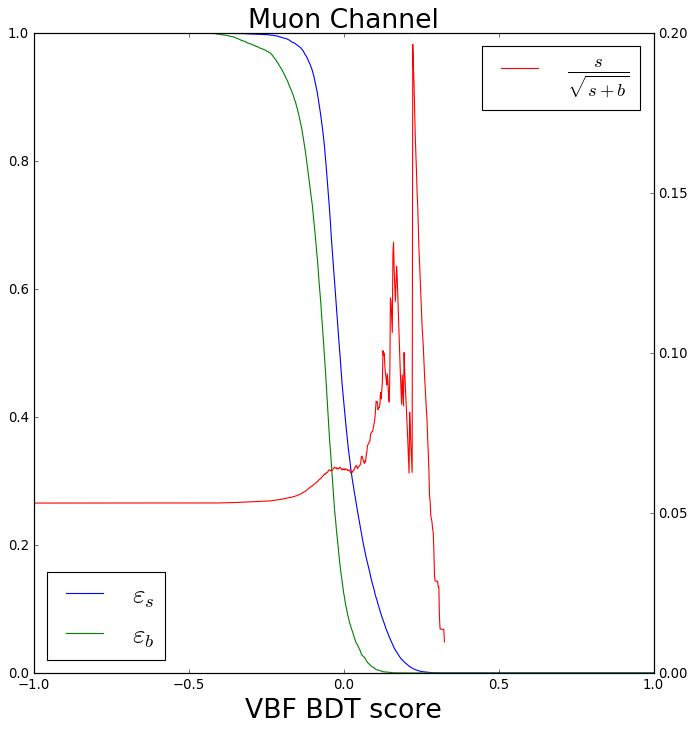

In [9]:
bdt_cuts = np.linspace(-1., 1., num=1000)
eff_s_arr_mu = []
eff_b_arr_mu = []
sens_app_arr_mu = []
for i in range(len(bdt_cuts)):
    this_sig = muon_sig.query('{0} < vbf_bdt'.format(bdt_cuts[i]))
    this_bg = muon_bg.query('{0} < vbf_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(muon_sig.eventWeight)
    eff_s_arr_mu.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(muon_bg.eventWeight)
    eff_b_arr_mu.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr_mu.append(sens_app)
    
eff_s_arr_mu = np.array(eff_s_arr_mu)
eff_b_arr_mu = np.array(eff_b_arr_mu)
sens_app_arr = np.array(sens_app_arr_mu)

fig, ax = plt.subplots()
ax.plot(bdt_cuts, eff_s_arr_mu, label=r'$\varepsilon_{s}$');
ax.plot(bdt_cuts, eff_b_arr_mu, label=r'$\varepsilon_{b}$');

ax2 = ax.twinx()
ax2.plot(bdt_cuts, sens_app_arr_mu, label=r'$\frac{s}{\sqrt{s+b}}$', color='r')
ax.set_xlabel('VBF BDT score')
#ax.set_ylabel('sensitivity')
ax.legend(loc='upper left');
#ax.set_xlim(-0.5, 0.2)
ax.legend(loc='lower left', prop={'size': 24});
ax2.legend(prop={'size': 24});
plt.title('Muon Channel')
plt.savefig('vbf_bdt_sensitivity_muon.png', dpi=500)
#ax2.set_ylim(0., 0.05)
#ax2.yaxis.set_ticks(np.linspace(0, 0.05, num=11))

sens_app_arr_mu = np.nan_to_num(sens_app_arr_mu)
ind_mu = sens_app_arr_mu.argmax()
print(bdt_cuts[ind_mu])

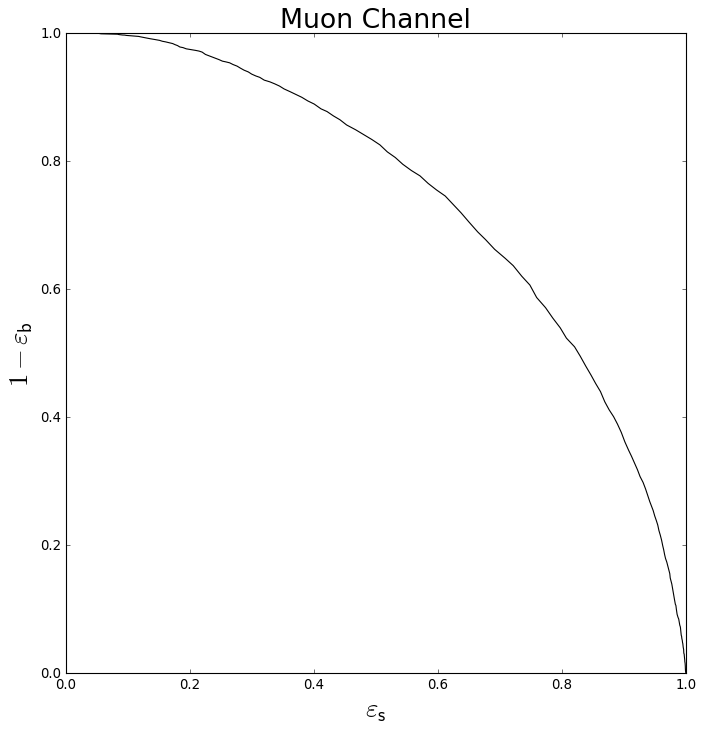

In [11]:
fig, ax = plt.subplots()
ax.plot(eff_s_arr_mu, 1 - eff_b_arr_mu, color='k')
ax.set_xlabel(r'$\sf \varepsilon_{s}$');
ax.set_ylabel(r'$\sf 1 - \varepsilon_{b}$');
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
#ax.scatter([eff_s_arr_mu[ind_mu]], [1 - eff_b_arr_mu[ind_mu]], color='r', marker='*', s=500);
plt.title('Muon Channel')
plt.savefig('vbf_bdt_roc_muon.png', dpi=500)

/home/jamesbueghly/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


0.20120120120120122


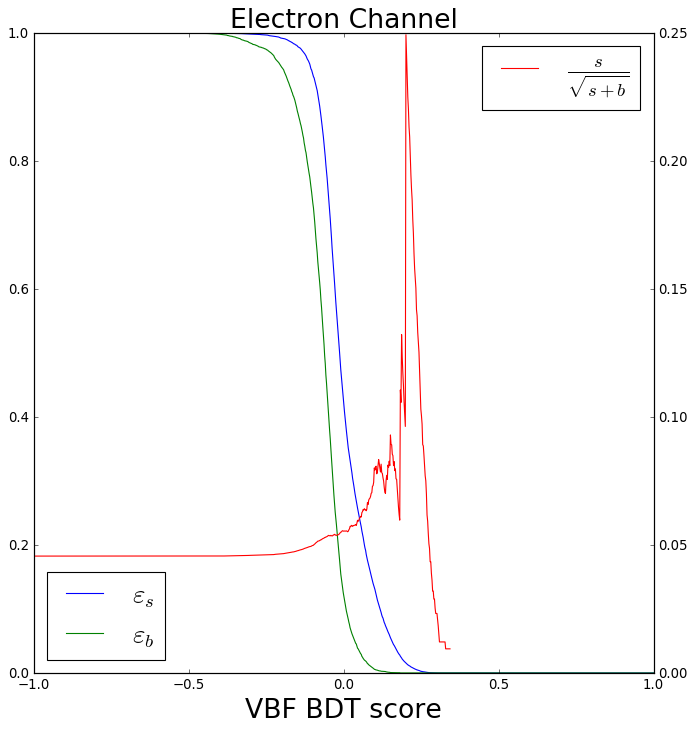

In [12]:
bdt_cuts = np.linspace(-1., 1., num=1000)
eff_s_arr_ele = []
eff_b_arr_ele = []
sens_app_arr_ele = []
for i in range(len(bdt_cuts)):
    this_sig = electron_sig.query('{0} < vbf_bdt'.format(bdt_cuts[i]))
    this_bg = electron_bg.query('{0} < vbf_bdt'.format(bdt_cuts[i]))
    eff_s = np.sum(this_sig.eventWeight)/np.sum(electron_sig.eventWeight)
    eff_s_arr_ele.append(eff_s)
    eff_b = np.sum(this_bg.eventWeight)/np.sum(electron_bg.eventWeight)
    eff_b_arr_ele.append(eff_b)
    sens_app = np.sum(this_sig.eventWeight)/np.sqrt(np.sum(this_sig.eventWeight)+np.sum(this_bg.eventWeight))
    sens_app_arr_ele.append(sens_app)
    
eff_s_arr_ele = np.array(eff_s_arr_ele)
eff_b_arr_ele = np.array(eff_b_arr_ele)
sens_app_arr_ele = np.array(sens_app_arr_ele)

fig, ax = plt.subplots()
ax.plot(bdt_cuts, eff_s_arr_ele, label=r'$\varepsilon_{s}$');
ax.plot(bdt_cuts, eff_b_arr_ele, label=r'$\varepsilon_{b}$');

ax2 = ax.twinx()
ax2.plot(bdt_cuts, sens_app_arr_ele, label=r'$\frac{s}{\sqrt{s+b}}$', color='r')
#plt.legend();
ax.set_xlabel('VBF BDT score')
#ax.legend(loc='upper left');
#ax.set_xlim(-0.5, 0.2)
ax.legend(loc='lower left', prop={'size': 24});
ax2.legend(prop={'size': 24});
plt.title('Electron Channel')
plt.savefig('vbf_bdt_sensitivity_electron.png', dpi=500)
#ax2.set_ylim(0., 0.05)
#ax2.yaxis.set_ticks(np.linspace(0, 0.05, num=11))

sens_app_arr_ele = np.nan_to_num(sens_app_arr_ele)
ind_ele = sens_app_arr_ele.argmax()
print(bdt_cuts[ind_ele])

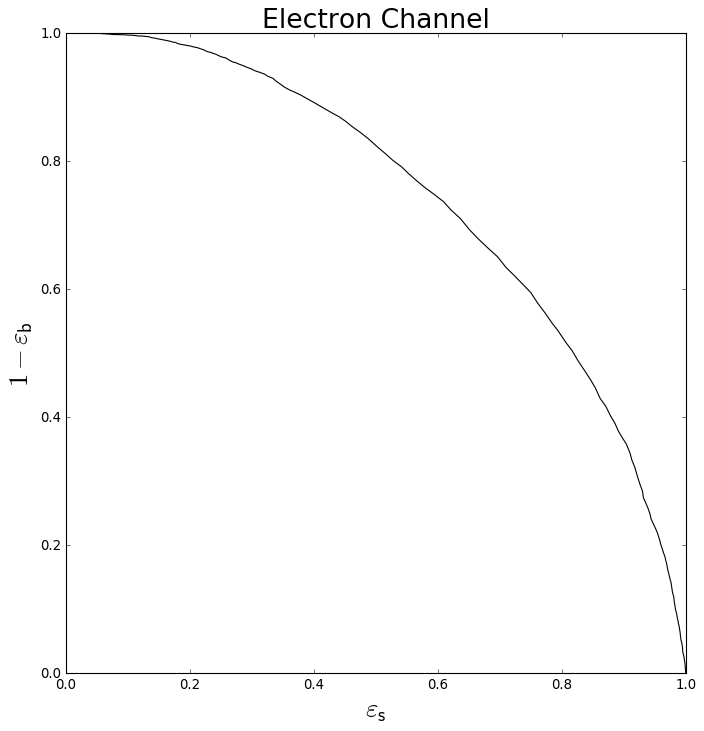

In [13]:
fig, ax = plt.subplots()
ax.plot(eff_s_arr_ele, 1 - eff_b_arr_ele, color='k')
ax.set_xlabel(r'$\sf \varepsilon_{s}$');
ax.set_ylabel(r'$\sf 1 - \varepsilon_{b}$');
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
#ax.scatter([eff_s_arr_ele[ind_ele]], [1 - eff_b_arr_ele[ind_ele]], color='r', marker='*', s=500);
plt.title('Electron Channel')
plt.savefig('vbf_bdt_roc_electron.png', dpi=500)